<a href="https://colab.research.google.com/github/PGaea/Butardo_DAF/blob/main/SalaryData_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [22]:
df = pd.read_csv('https://raw.githubusercontent.com/PGaea/Butardo_DAF/da2681d891071e1bb5cca7dfb702d492c592728f/Salary_Data1.csv ')

In [23]:
print(df)

       Age  Gender    Education Level              Job Title  \
0     32.0    Male         Bachelor's      Software Engineer   
1     28.0  Female           Master's           Data Analyst   
2     45.0    Male                PhD         Senior Manager   
3     36.0  Female         Bachelor's        Sales Associate   
4     52.0    Male           Master's               Director   
...    ...     ...                ...                    ...   
6699  49.0  Female                PhD  Director of Marketing   
6700  32.0    Male        High School        Sales Associate   
6701  30.0  Female  Bachelor's Degree      Financial Manager   
6702  46.0    Male    Master's Degree      Marketing Manager   
6703  26.0  Female        High School        Sales Executive   

      Years of Experience    Salary  
0                     5.0   90000.0  
1                     3.0   65000.0  
2                    15.0  150000.0  
3                     7.0   60000.0  
4                    20.0  200000.0  
...

In [24]:
# 2.) Handle missing data
print("\nMissing Values Before Cleaning:")
print(df.isna().sum())  # Check for missing values


Missing Values Before Cleaning:
Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64


In [25]:
# Drop rows with missing values (or use fillna() to fill with a value like the mean)
df = df.dropna()  # Remove rows with missing values

In [26]:
print("\nMissing Values After Cleaning:")
print(df.isna().sum())  # Check if missing values are removed


Missing Values After Cleaning:
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64


In [27]:
# 3.) The explanatory variables: Independent Variable (Years of Experience)
X = df[['Years of Experience']]  # Explanatory variable (Years of Experience)
y = df['Salary']  # Dependent variable (Salary)

In [28]:
# 4.) Model Fitting: Fit the model using Linear Regression from sklearn
model = LinearRegression()  # Initialize Linear Regression model
model.fit(X, y)  # Fit the model to the data

LinearRegression()

In [29]:
# 5.) Print the intercept and coefficient values after the model is trained
print(f"\nIntercept (β₀): {model.intercept_}")  # The intercept value, i.e., predicted salary when X = 0
print(f"Coefficient (β₁): {model.coef_[0]}")  # The coefficient of 'Years of Experience' (effect on salary)


Intercept (β₀): 58284.685676958085
Coefficient (β₁): 7046.734456548321


In [34]:
# 6.) Predict salaries using the model
y_pred = model.predict(X)  # Predict the Salary based on the fitted model

In [35]:
# 7.) Using statsmodels for p-values and summary (for statistical analysis)
X_with_const = sm.add_constant(X)  # Add a constant for the intercept term (which is necessary for OLS in statsmodels)
ols_model = sm.OLS(y, X_with_const).fit()  # Fit the OLS model using statsmodels

In [36]:
# Print summary (includes p-values, coefficients, R-squared, etc.)
print(f"\nModel Summary (using statsmodels):\n{ols_model.summary()}")  # Summary of statsmodels results


Model Summary (using statsmodels):
                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                 1.268e+04
Date:                Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                        08:58:04   Log-Likelihood:                -78780.
No. Observations:                6698   AIC:                         1.576e+05
Df Residuals:                    6696   BIC:                         1.576e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

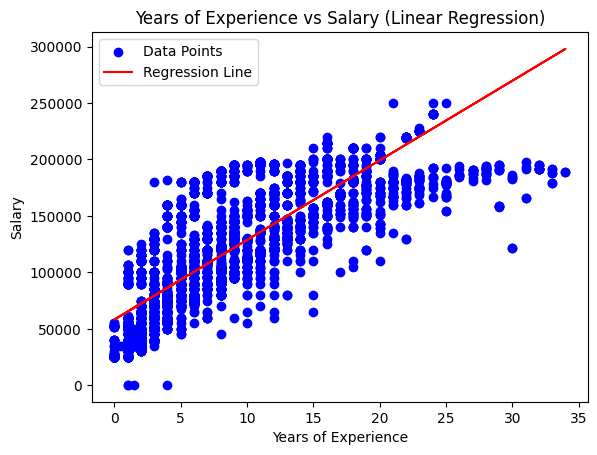

In [37]:

# 8.) Plotting the Regression Line and the Data Points
plt.scatter(X, y, color='blue', label='Data Points')  # Actual data points
plt.plot(X, y_pred, color='red', label='Regression Line')  # Regression line
plt.title("Years of Experience vs Salary (Linear Regression)")
plt.xlabel("Years of Experience")  # Label for X-axis
plt.ylabel("Salary")  # Label for Y-axis
plt.legend()  # Display legend for plot
plt.show()  # Show the plot

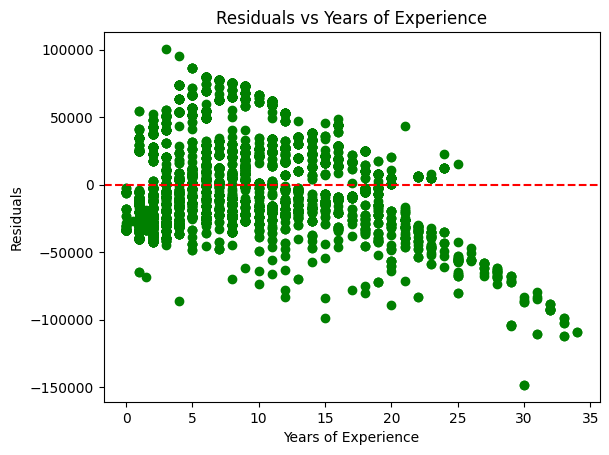

In [38]:
# 9.) Residuals Plot: Check for the residuals (actual - predicted values)
residuals = y - y_pred  # Calculate residuals
plt.scatter(X, residuals, color='green')  # Plot residuals
plt.axhline(0, color='red', linestyle='--')  # Red dashed line for residuals = 0
plt.title("Residuals vs Years of Experience")
plt.xlabel("Years of Experience")  # Label for X-axis
plt.ylabel("Residuals")  # Label for Y-axis
plt.show()  # Display residuals plot


In [39]:
# 10.) Maximum and minimum predicted Salaries:
print(f"\nMaximum predicted Salary: {y_pred.max()}")  # Highest predicted salary
print(f"Minimum predicted Salary: {y_pred.min()}")  # Lowest predicted salary


Maximum predicted Salary: 297873.657199601
Minimum predicted Salary: 58284.685676958085
